### FOR LINEAR REGRESSION

In [61]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
df= pd.read_csv('stock market ka data-copy1.txt')
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2008-08-15,44.886,44.886,44.886,44.886,112,0
1,2008-08-18,44.564,44.564,43.875,43.875,28497,0
2,2008-08-19,43.283,43.283,43.283,43.283,112,0
3,2008-08-20,43.918,43.918,43.892,43.892,4468,0
4,2008-08-22,44.097,44.097,44.017,44.071,4006,0


### Scatter plot of the Dataset

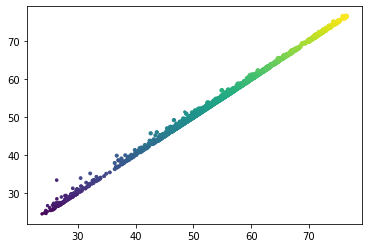

In [64]:
plt.scatter(df.Open,df.High,df.Low,df.Close,marker='.')

In [65]:
dm=df.drop(['Date','OpenInt','Volume'],axis=1)
dm

,Open,High,Low,Close
0,44.886,44.886,44.886,44.886
1,44.564,44.564,43.875,43.875
2,43.283,43.283,43.283,43.283
3,43.918,43.918,43.892,43.892
4,44.097,44.097,44.017,44.071
...,...,...,...,...
2320,75.900,76.530,75.890,76.530
2321,76.490,76.580,76.090,76.185
2322,76.370,76.590,76.290,76.570
2323,76.040,76.200,75.580,76.110


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2325 non-null   object 
 1   Open     2325 non-null   float64
 2   High     2325 non-null   float64
 3   Low      2325 non-null   float64
 4   Close    2325 non-null   float64
 5   Volume   2325 non-null   int64  
 6   OpenInt  2325 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 127.3+ KB


In [67]:
df.describe()

,Open,High,Low,Close,Volume,OpenInt
count,2325.000000,2325.000000,2325.000000,2325.000000,2.325000e+03,2325.0
mean,52.777942,53.053542,52.434874,52.771123,7.227833e+05,0.0
std,9.010415,8.925002,9.162792,9.039141,7.772272e+05,0.0
min,23.790000,24.605000,19.699000,22.726000,1.120000e+02,0.0
25%,49.032000,49.335000,48.575000,49.054000,2.791240e+05,0.0
50%,53.716000,53.975000,53.521000,53.753000,5.080570e+05,0.0
75%,57.483000,57.675000,57.141000,57.421000,8.809640e+05,0.0
max,76.490000,76.590000,76.290000,76.570000,1.048028e+07,0.0


In [68]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')

In [69]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,10))
scaled=sc.fit_transform(dm)

In [248]:
scaled

array([[ 4.00303605,  3.90131769,  4.45070771,  4.1155932 ],
       [ 3.94193548,  3.83937674,  4.27205739,  3.92782854],
       [ 3.69886148,  3.59295951,  4.16744712,  3.81788129],
       ...,
       [ 9.9772296 , 10.        , 10.        , 10.        ],
       [ 9.91461101,  9.92497836,  9.87453835,  9.91456801],
       [ 9.92789374,  9.9153602 ,  9.92578325,  9.90899636]])

In [71]:
scaled_dm=pd.DataFrame(scaled,columns=dm.columns)
scaled_dm

,Open,High,Low,Close
0,4.003036,3.901318,4.450708,4.115593
1,3.941935,3.839377,4.272057,3.927829
2,3.698861,3.592960,4.167447,3.817881
3,3.819355,3.715110,4.275061,3.930986
4,3.853321,3.749543,4.297150,3.964230
...,...,...,...,...
2320,9.888046,9.988458,9.929317,9.992571
2321,10.000000,9.998076,9.964659,9.928497
2322,9.977230,10.000000,10.000000,10.000000
2323,9.914611,9.924978,9.874538,9.914568


In [72]:
x=scaled_dm[['Open','Close','Low']]
y=scaled_dm.High

In [73]:
x

,Open,Close,Low
0,4.003036,4.115593,4.450708
1,3.941935,3.927829,4.272057
2,3.698861,3.817881,4.167447
3,3.819355,3.930986,4.275061
4,3.853321,3.964230,4.297150
...,...,...,...
2320,9.888046,9.992571,9.929317
2321,10.000000,9.928497,9.964659
2322,9.977230,10.000000,10.000000
2323,9.914611,9.914568,9.874538


In [74]:
len(x)

2325

In [75]:
y

0        3.901318
1        3.839377
2        3.592960
3        3.715110
4        3.749543
          ...    
2320     9.988458
2321     9.998076
2322    10.000000
2323     9.924978
2324     9.915360
Name: High, Length: 2325, dtype: float64

In [139]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [140]:
x_train

,Open,Close,Low
1350,6.152941,6.296338,6.452793
2259,8.819734,8.623802,8.733014
152,1.425617,1.479645,1.920623
1487,6.944592,7.002080,7.173756
2091,6.242694,6.356883,6.526656
...,...,...,...
286,4.481973,4.573026,4.849534
1423,6.279317,6.371369,6.532311
193,2.896964,2.938118,3.299995
350,5.260342,5.375901,5.593116


In [141]:
len(x_train)

1627

In [142]:
y_train

1350    6.169280
2259    8.797730
152     1.288449
1487    6.903722
2091    6.237953
          ...   
286     4.401077
1423    6.246994
193     2.838511
350     5.237857
1946    5.005290
Name: High, Length: 1627, dtype: float64

In [143]:
len(y_train)

1627

In [144]:
x_test

,Open,Close,Low
2037,6.950474,7.011366,7.179764
53,1.067173,1.272194,1.702744
280,4.376850,4.472922,4.733792
1241,5.485579,5.628854,5.790320
1393,5.819734,5.930280,6.127476
...,...,...,...
111,0.934535,1.178776,1.371773
433,4.930550,5.065188,5.248361
1409,5.796584,5.949595,6.120938
2020,6.472296,6.572691,6.739764


In [145]:
#realstock=y_test
#do=pd.DataFrame(realstock)
#do

In [146]:
#scaledo=sc.fit_transform(do)
#scaledo

In [147]:
l1=LinearRegression()

In [148]:
l1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
l1.coef_    # these are the slopes or gradient

array([ 0.53978749,  0.62705971, -0.16077572])

In [150]:
l1.intercept_    # this is the intercept

-0.06467822792211919

### Predicted values

In [151]:
lr=l1.predict(x_test)

lr


array([ 6.92931448,  1.03534974,  4.34160098,  5.49505308,  5.81023189,
        5.9963348 ,  6.1081915 ,  4.82255087,  8.26653844,  6.55176599,
        3.68722576,  8.1092052 ,  6.23946118,  6.68401615,  6.03092058,
        6.91808035,  5.45115203,  5.27804177,  5.74681544,  5.72837549,
        4.58090753,  4.63096837,  5.95339995,  4.77049757,  4.7102463 ,
        5.48054047,  5.03889597,  4.46322703,  5.11467835,  4.48382487,
        4.37510699,  5.73490379,  3.30942028,  6.66955641,  5.41370973,
        4.09121346,  5.52962035,  5.40492422,  7.0727976 ,  5.53714739,
        5.45434398,  5.53732087,  6.89590292,  6.09790677,  6.22844654,
        6.52441338,  6.05348053,  4.24820169,  6.12424168,  6.08518378,
        6.72576335,  5.01902115,  5.98583788,  5.18900933,  6.75507559,
        4.42379941,  1.84926958,  4.41964485,  6.8871461 ,  5.77976088,
        2.38615686,  7.40965795,  5.31372372,  7.16580065,  5.69231233,
        5.7155603 ,  5.92321746,  6.01586747,  4.64295108,  6.84

In [152]:
import seaborn as sns

In [153]:
predicted_val=pd.DataFrame(lr)
predicted_val

,0
0,6.929314
1,1.035350
2,4.341601
3,5.495053
4,5.810232
...,...
693,0.958387
694,4.929138
695,5.810899
696,6.466866


In [171]:
compared_val=pd.DataFrame(y_test)
compared_val.reset_index(drop=True,inplace=True)

In [172]:
compared_val['predicted_high_LR']=lr
compared_val

,High,predicted_high_LR
0,6.936616,6.929314
1,0.993941,1.035350
2,4.304319,4.341601
3,5.474271,5.495053
4,5.782437,5.810232
...,...,...
693,0.859479,0.958387
694,4.895066,4.929138
695,5.813215,5.810899
696,6.463211,6.466866


In [156]:
import scipy
from scipy.stats import spearmanr,pearsonr

In [246]:
s_coeff=spearmanr(lr,y_test)
s_coeff

SpearmanrResult(correlation=0.9996202225720151, pvalue=0.0)

In [158]:
#scaledon=sc.fit_transform(do1)
#scaledon

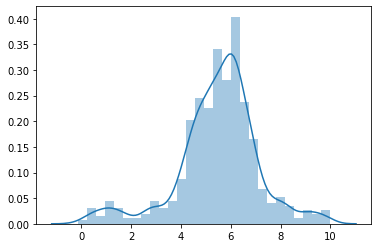

In [159]:
sns.distplot(predicted_val) #it shows the distributin of predicted data

In [169]:
df_ytest=pd.DataFrame(y_test)
df_ytest.reset_index(drop=True,inplace=True)

### Plot between predicted values and test values

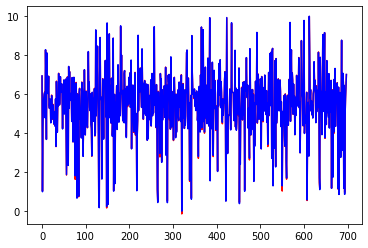

In [170]:
plt.plot(predicted_val,color='red',label='realprice')
plt.plot(df_ytest,color='blue',label='predicted')
plt.show()

In [163]:
len(predicted_val)

698

In [173]:
l1.score(x_test,y_test) # has to be removed

0.9995287719587658

In [174]:
from sklearn import metrics

In [175]:
print('MAE:',metrics.mean_absolute_error(y_test,lr))
print('MSE:',metrics.mean_squared_error(y_test,lr))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,lr)))

MAE: 0.02469968007410262
MSE: 0.0012893368678432346
RMSE: 0.15716131863185234


In [176]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(l1,x,y,cv=5)
score

array([0.99648567, 0.99827575, 0.99784216, 0.99823197, 0.99971495])

In [177]:
score.mean()

0.9981101016182252

### FOR K-NEAREST NEIGHBOR

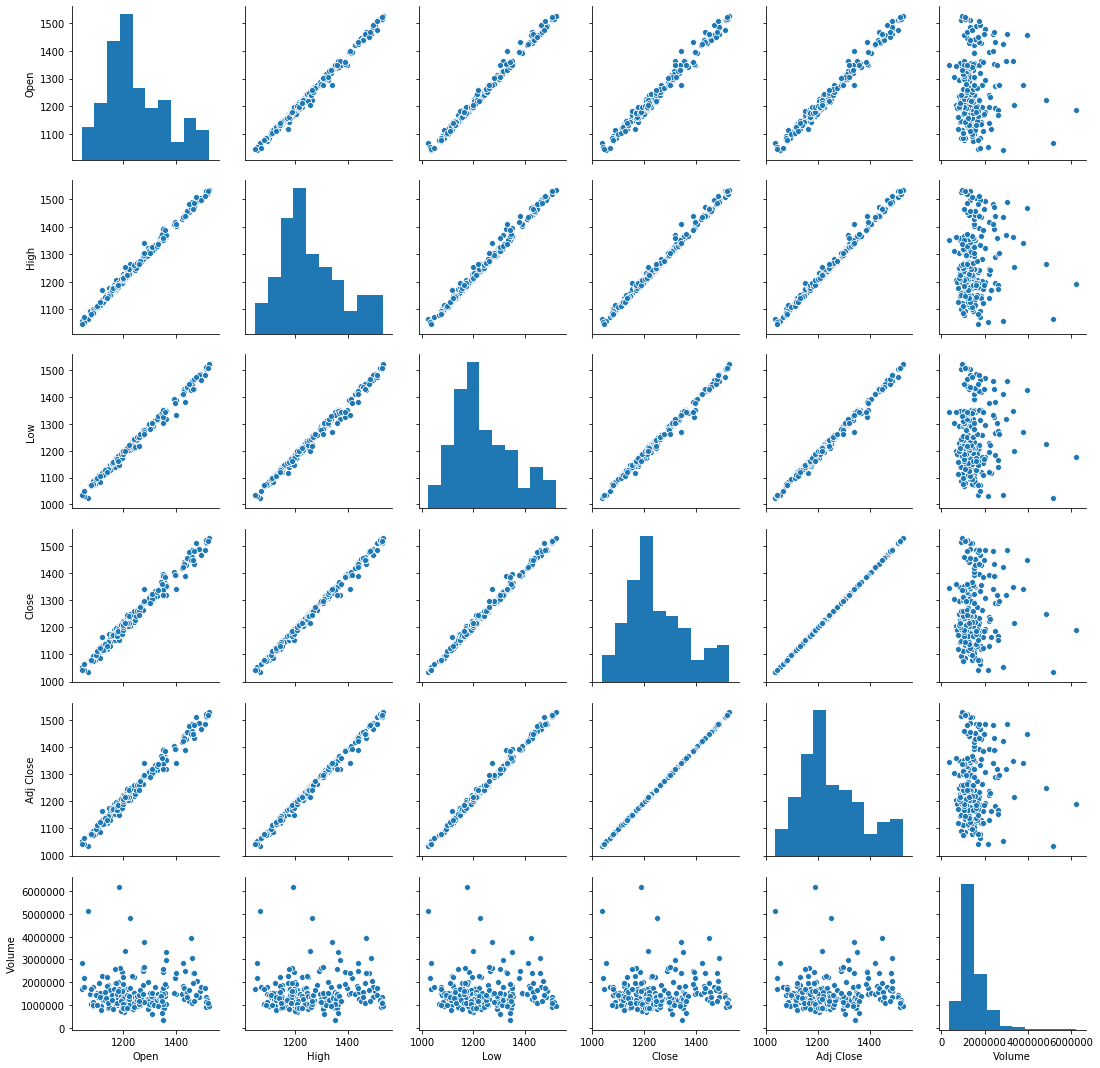

In [46]:
sns.pairplot(df)

In [178]:
x_train 

,Open,Close,Low
1350,6.152941,6.296338,6.452793
2259,8.819734,8.623802,8.733014
152,1.425617,1.479645,1.920623
1487,6.944592,7.002080,7.173756
2091,6.242694,6.356883,6.526656
...,...,...,...
286,4.481973,4.573026,4.849534
1423,6.279317,6.371369,6.532311
193,2.896964,2.938118,3.299995
350,5.260342,5.375901,5.593116


In [179]:
y_train

1350    6.169280
2259    8.797730
152     1.288449
1487    6.903722
2091    6.237953
          ...   
286     4.401077
1423    6.246994
193     2.838511
350     5.237857
1946    5.005290
Name: High, Length: 1627, dtype: float64

In [180]:
x_test

,Open,Close,Low
2037,6.950474,7.011366,7.179764
53,1.067173,1.272194,1.702744
280,4.376850,4.472922,4.733792
1241,5.485579,5.628854,5.790320
1393,5.819734,5.930280,6.127476
...,...,...,...
111,0.934535,1.178776,1.371773
433,4.930550,5.065188,5.248361
1409,5.796584,5.949595,6.120938
2020,6.472296,6.572691,6.739764


In [181]:
len(x_train) # lenth of y_train will be same

1627

In [182]:
len(x_test) # length of y_test will be same

698

In [183]:
y_test

2037    6.936616
53      0.993941
280     4.304319
1241    5.474271
1393    5.782437
          ...   
111     0.859479
433     4.895066
1409    5.813215
2020    6.463211
1715    7.010676
Name: High, Length: 698, dtype: float64

In [48]:
#scaledo  # scaled y_test

array([[ 4.25775681],
       [ 1.15006251],
       [ 2.43512581],
       [ 2.63796117],
       [ 2.60470956],
       [ 2.72397212],
       [ 8.52194585],
       [ 5.62794619],
       [ 7.91698734],
       [ 2.70069491],
       [ 8.87363684],
       [ 4.05182034],
       [ 3.62309427],
       [ 1.04243855],
       [ 9.94533564],
       [ 2.74392362],
       [ 4.04173228],
       [ 2.3954474 ],
       [ 6.02962554],
       [ 3.54417854],
       [ 3.13895159],
       [ 1.31720814],
       [ 1.71489611],
       [ 4.17551535],
       [10.        ],
       [ 2.19793205],
       [ 9.55906166],
       [ 3.39166437],
       [ 3.39410249],
       [ 3.68715938],
       [ 2.55062158],
       [ 0.        ],
       [ 2.00762015],
       [ 2.17221671],
       [ 1.47648194],
       [ 9.18897243],
       [ 1.96539267],
       [ 7.91543407],
       [ 1.55484568],
       [ 2.63796117],
       [ 2.98533065],
       [ 0.25847661],
       [ 3.61378557],
       [ 2.03056454],
       [ 5.07641268],
       [ 6

In [184]:
from sklearn.neighbors import KNeighborsRegressor
k=KNeighborsRegressor(n_neighbors=5)


In [185]:
k.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [186]:
p=k.predict(x_test)
kr=pd.DataFrame(p)
kr

,0
0,6.914264
1,1.033914
2,4.316360
3,5.471501
4,5.808445
...,...
693,0.840973
694,4.906569
695,5.817293
696,6.461133


In [189]:
#pap=sc.fit_transform(kr)
#pap

array([[ 6.90755053],
       [ 0.92641218],
       [ 4.26511965],
       [ 5.44005948],
       [ 5.78277798],
       [ 5.96665949],
       [ 6.08902542],
       [ 4.78052789],
       [ 8.28425522],
       [ 6.5066818 ],
       [ 3.58966131],
       [ 8.12494864],
       [ 6.24246219],
       [ 6.68680663],
       [ 6.01447886],
       [ 6.89729793],
       [ 5.41341055],
       [ 5.2319161 ],
       [ 5.71163592],
       [ 5.69942672],
       [ 4.51924319],
       [ 4.55446203],
       [ 5.92169677],
       [ 4.71102937],
       [ 4.68109335],
       [ 5.41552368],
       [ 5.01058522],
       [ 4.44943161],
       [ 5.05613493],
       [ 4.4302569 ],
       [ 4.32448297],
       [ 5.6876871 ],
       [ 3.19415367],
       [ 6.64066994],
       [ 5.36602164],
       [ 3.98732122],
       [ 5.49871843],
       [ 5.3824571 ],
       [ 7.06400047],
       [ 5.48823104],
       [ 5.4049189 ],
       [ 5.49460956],
       [ 6.8821147 ],
       [ 6.05134125],
       [ 6.18247275],
       [ 6

In [190]:
k.score(x_test,y_test)

0.9993691444066668

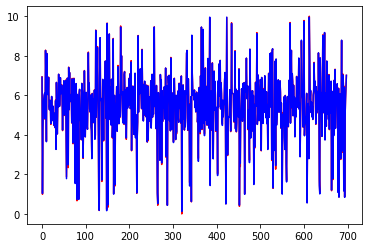

In [207]:
plt.plot(df_ytest,color='red',label='realprice')
plt.plot(kr,color='blue',label='predicted')
plt.show()

In [192]:
print('MAE:',metrics.mean_absolute_error(y_test,p))
print('MSE:',metrics.mean_squared_error(y_test,p))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,p)))

MAE: 0.025410046373857503
MSE: 0.0017260971410769
RMSE: 0.1594052896671171


In [193]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(k,x,y,cv=5)
score

array([0.21330182, 0.99767231, 0.99794229, 0.9974899 , 0.8712219 ])

In [194]:
score.mean()

0.815525643572655

### FOR SUPPORT VECTOR MACHINE

In [195]:
x_train

,Open,Close,Low
1350,6.152941,6.296338,6.452793
2259,8.819734,8.623802,8.733014
152,1.425617,1.479645,1.920623
1487,6.944592,7.002080,7.173756
2091,6.242694,6.356883,6.526656
...,...,...,...
286,4.481973,4.573026,4.849534
1423,6.279317,6.371369,6.532311
193,2.896964,2.938118,3.299995
350,5.260342,5.375901,5.593116


In [196]:
y_train

1350    6.169280
2259    8.797730
152     1.288449
1487    6.903722
2091    6.237953
          ...   
286     4.401077
1423    6.246994
193     2.838511
350     5.237857
1946    5.005290
Name: High, Length: 1627, dtype: float64

In [197]:
x_test

,Open,Close,Low
2037,6.950474,7.011366,7.179764
53,1.067173,1.272194,1.702744
280,4.376850,4.472922,4.733792
1241,5.485579,5.628854,5.790320
1393,5.819734,5.930280,6.127476
...,...,...,...
111,0.934535,1.178776,1.371773
433,4.930550,5.065188,5.248361
1409,5.796584,5.949595,6.120938
2020,6.472296,6.572691,6.739764


In [198]:
len(x_train)

1627

In [199]:
len(x_test)

698

In [200]:
y_test

2037    6.936616
53      0.993941
280     4.304319
1241    5.474271
1393    5.782437
          ...   
111     0.859479
433     4.895066
1409    5.813215
2020    6.463211
1715    7.010676
Name: High, Length: 698, dtype: float64

In [64]:
#scaledo # scaled y_test

array([[ 4.25775681],
       [ 1.15006251],
       [ 2.43512581],
       [ 2.63796117],
       [ 2.60470956],
       [ 2.72397212],
       [ 8.52194585],
       [ 5.62794619],
       [ 7.91698734],
       [ 2.70069491],
       [ 8.87363684],
       [ 4.05182034],
       [ 3.62309427],
       [ 1.04243855],
       [ 9.94533564],
       [ 2.74392362],
       [ 4.04173228],
       [ 2.3954474 ],
       [ 6.02962554],
       [ 3.54417854],
       [ 3.13895159],
       [ 1.31720814],
       [ 1.71489611],
       [ 4.17551535],
       [10.        ],
       [ 2.19793205],
       [ 9.55906166],
       [ 3.39166437],
       [ 3.39410249],
       [ 3.68715938],
       [ 2.55062158],
       [ 0.        ],
       [ 2.00762015],
       [ 2.17221671],
       [ 1.47648194],
       [ 9.18897243],
       [ 1.96539267],
       [ 7.91543407],
       [ 1.55484568],
       [ 2.63796117],
       [ 2.98533065],
       [ 0.25847661],
       [ 3.61378557],
       [ 2.03056454],
       [ 5.07641268],
       [ 6

In [201]:
from sklearn.svm import SVR
m=SVR(kernel='linear')

In [202]:
m.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [203]:
m1=m.predict(x_test)
m1

array([ 6.98549423,  1.05824332,  4.38229269,  5.53990048,  5.85910236,
        6.0464714 ,  6.15912964,  4.86768372,  8.3307032 ,  6.60618162,
        3.71877286,  8.17267771,  6.29219837,  6.73860339,  6.08242157,
        6.97448495,  5.49934009,  5.3254366 ,  5.79233993,  5.77630206,
        4.62358869,  4.6740021 ,  6.00507145,  4.81509262,  4.75446237,
        5.5276779 ,  5.08508407,  4.50492201,  5.16002047,  4.52685851,
        4.41327178,  5.7856247 ,  3.33252763,  6.72445481,  5.46086191,
        4.127791  ,  5.57418221,  5.4539151 ,  7.13031233,  5.5852089 ,
        5.50079429,  5.58541641,  6.95016305,  6.14977049,  6.2795324 ,
        6.57935908,  6.10515693,  4.28828928,  6.17217081,  6.13637986,
        6.77923906,  5.06422441,  6.03805692,  5.23505943,  6.81098867,
        4.4653404 ,  1.86916088,  4.46283586,  6.94205693,  5.82941647,
        2.41876025,  7.4671108 ,  5.3597789 ,  7.2218887 ,  5.73622755,
        5.76593152,  5.97248096,  6.06783355,  4.68498269,  6.89

In [204]:
dff=pd.DataFrame(m1)
dff

,0
0,6.985494
1,1.058243
2,4.382293
3,5.539900
4,5.859102
...,...
693,0.970291
694,4.970723
695,5.858499
696,6.519383


In [205]:
#supportvec=sc.fit_transform(dff)
#supportvec

array([[ 6.98488855],
       [ 1.16387407],
       [ 4.42834521],
       [ 5.56520474],
       [ 5.87868544],
       [ 6.06269619],
       [ 6.17333521],
       [ 4.90503639],
       [ 8.30598682],
       [ 6.6123745 ],
       [ 3.7767179 ],
       [ 8.15079368],
       [ 6.3040189 ],
       [ 6.74242283],
       [ 6.09800201],
       [ 6.97407659],
       [ 5.52537133],
       [ 5.35458477],
       [ 5.81311962],
       [ 5.7973692 ],
       [ 4.66531636],
       [ 4.71482619],
       [ 6.02203827],
       [ 4.8533879 ],
       [ 4.79384434],
       [ 5.55320123],
       [ 5.11854018],
       [ 4.54877659],
       [ 5.19213347],
       [ 4.57031991],
       [ 4.45876904],
       [ 5.80652475],
       [ 3.3973955 ],
       [ 6.72852784],
       [ 5.48758281],
       [ 4.17840505],
       [ 5.59887202],
       [ 5.48076051],
       [ 7.12711102],
       [ 5.60970108],
       [ 5.52679947],
       [ 5.60990487],
       [ 6.95019063],
       [ 6.16414381],
       [ 6.29157995],
       [ 6

In [210]:
print('MAE:',metrics.mean_absolute_error(y_test,m1))
print('MSE:',metrics.mean_squared_error(y_test,m1))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,m1)))

MAE: 0.05623365769605845
MSE: 0.0038498799179668814
RMSE: 0.23713636940810756


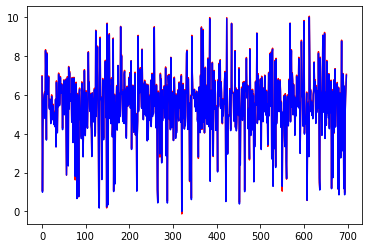

In [208]:
plt.plot(dff,color='red',label='realprice')
plt.plot(df_ytest,color='blue',label='predicted')
plt.show()

In [211]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(m,x,y,cv=5)
score

array([0.99711364, 0.99511911, 0.9884158 , 0.99456855, 0.99861751])

In [212]:
score.mean()

0.9947669225829585

### FOR DECISION TREE

In [213]:
x_train

,Open,Close,Low
1350,6.152941,6.296338,6.452793
2259,8.819734,8.623802,8.733014
152,1.425617,1.479645,1.920623
1487,6.944592,7.002080,7.173756
2091,6.242694,6.356883,6.526656
...,...,...,...
286,4.481973,4.573026,4.849534
1423,6.279317,6.371369,6.532311
193,2.896964,2.938118,3.299995
350,5.260342,5.375901,5.593116


In [214]:
y_train

1350    6.169280
2259    8.797730
152     1.288449
1487    6.903722
2091    6.237953
          ...   
286     4.401077
1423    6.246994
193     2.838511
350     5.237857
1946    5.005290
Name: High, Length: 1627, dtype: float64

In [215]:
x_test

,Open,Close,Low
2037,6.950474,7.011366,7.179764
53,1.067173,1.272194,1.702744
280,4.376850,4.472922,4.733792
1241,5.485579,5.628854,5.790320
1393,5.819734,5.930280,6.127476
...,...,...,...
111,0.934535,1.178776,1.371773
433,4.930550,5.065188,5.248361
1409,5.796584,5.949595,6.120938
2020,6.472296,6.572691,6.739764


In [233]:
len(x_train)

1627

In [234]:
len(x_test)

698

In [218]:
y_test

2037    6.936616
53      0.993941
280     4.304319
1241    5.474271
1393    5.782437
          ...   
111     0.859479
433     4.895066
1409    5.813215
2020    6.463211
1715    7.010676
Name: High, Length: 698, dtype: float64

In [82]:
#scaledo

array([[ 4.25775681],
       [ 1.15006251],
       [ 2.43512581],
       [ 2.63796117],
       [ 2.60470956],
       [ 2.72397212],
       [ 8.52194585],
       [ 5.62794619],
       [ 7.91698734],
       [ 2.70069491],
       [ 8.87363684],
       [ 4.05182034],
       [ 3.62309427],
       [ 1.04243855],
       [ 9.94533564],
       [ 2.74392362],
       [ 4.04173228],
       [ 2.3954474 ],
       [ 6.02962554],
       [ 3.54417854],
       [ 3.13895159],
       [ 1.31720814],
       [ 1.71489611],
       [ 4.17551535],
       [10.        ],
       [ 2.19793205],
       [ 9.55906166],
       [ 3.39166437],
       [ 3.39410249],
       [ 3.68715938],
       [ 2.55062158],
       [ 0.        ],
       [ 2.00762015],
       [ 2.17221671],
       [ 1.47648194],
       [ 9.18897243],
       [ 1.96539267],
       [ 7.91543407],
       [ 1.55484568],
       [ 2.63796117],
       [ 2.98533065],
       [ 0.25847661],
       [ 3.61378557],
       [ 2.03056454],
       [ 5.07641268],
       [ 6

In [219]:
from sklearn import tree
d=tree.DecisionTreeRegressor()

In [220]:
d.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [221]:
de=d.predict(x_test)
de

array([6.90372223, 1.04876407, 4.33817447, 5.46503799, 5.81379244,
       5.9722997 , 6.08310089, 4.84312783, 8.29527748, 6.54381071,
       3.67759931, 8.05886313, 6.23776089, 6.67596422, 6.00750216,
       6.90583822, 5.43810715, 5.28806386, 5.75242859, 5.73800135,
       4.55919977, 4.61556218, 5.96787535, 4.73867462, 4.72982591,
       5.47427142, 5.00009618, 4.45070693, 5.08704434, 4.49918246,
       4.33586612, 5.73819371, 3.35712225, 6.66788497, 5.3819371 ,
       4.11330191, 5.54467635, 5.41425411, 7.08800616, 5.49908627,
       5.44887948, 5.52659421, 6.89833606, 6.09098778, 6.21640858,
       6.50485717, 6.05559296, 4.21448495, 6.04924497, 6.06078677,
       6.74540733, 5.0156776 , 5.97941714, 5.1572569 , 6.74540733,
       4.40107723, 1.67933058, 4.41069539, 6.87294412, 5.75743003,
       2.39261325, 7.40367414, 5.26094066, 7.15860344, 5.68664038,
       5.7121285 , 5.88015774, 5.98768876, 4.60748293, 6.83620275,
       5.5961335 , 3.48235068, 6.30989709, 6.87294412, 6.04462

In [222]:
dff1=pd.DataFrame(de)
dff1

,0
0,6.903722
1,1.048764
2,4.338174
3,5.465038
4,5.813792
...,...
693,0.919688
694,4.901222
695,5.836876
696,6.459363


In [87]:
#decision=sc.fit_transform(dff1)
#decision

array([[ 4.14475845],
       [ 0.77618955],
       [ 2.39946249],
       [ 2.4219721 ],
       [ 2.39645621],
       [ 2.39645621],
       [ 8.18562894],
       [ 5.58869147],
       [ 7.9442527 ],
       [ 2.3759517 ],
       [ 8.95680429],
       [ 3.78639563],
       [ 3.36879975],
       [ 0.71581627],
       [ 9.75087581],
       [ 2.39946249],
       [ 3.80917778],
       [ 2.22695552],
       [ 5.72538439],
       [ 3.36879975],
       [ 2.99608126],
       [ 1.11655358],
       [ 1.24504527],
       [ 3.90281209],
       [10.        ],
       [ 1.99876968],
       [ 9.35262196],
       [ 2.86280623],
       [ 2.81428013],
       [ 3.69184912],
       [ 2.3759517 ],
       [ 0.03371993],
       [ 1.89433665],
       [ 2.14608056],
       [ 1.24504527],
       [ 9.35262196],
       [ 1.85674553],
       [ 7.9442527 ],
       [ 1.30029311],
       [ 2.39946249],
       [ 3.09153994],
       [ 0.03371993],
       [ 3.46995117],
       [ 1.8806679 ],
       [ 4.92185737],
       [ 6

In [223]:
print('MAE:',metrics.mean_absolute_error(y_test,de))
print('MSE:',metrics.mean_squared_error(y_test,de))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,de)))

MAE: 0.028295466539967853
MSE: 0.002116064863250617
RMSE: 0.16821256356160752


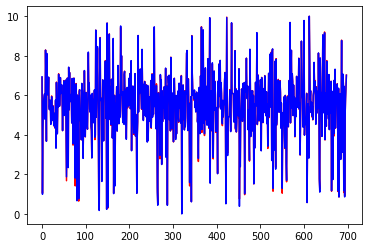

In [224]:
plt.plot(dff1,color='red',label='realprice')
plt.plot(df_ytest,color='blue',label='predicted')
plt.show()

In [225]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(d,x,y,cv=5)
score

array([0.32641757, 0.99686885, 0.99661836, 0.99671435, 0.88153222])

In [226]:
score.mean()

0.8396302697387472

### FOR RANDOM FOREST

In [227]:
x_test

,Open,Close,Low
2037,6.950474,7.011366,7.179764
53,1.067173,1.272194,1.702744
280,4.376850,4.472922,4.733792
1241,5.485579,5.628854,5.790320
1393,5.819734,5.930280,6.127476
...,...,...,...
111,0.934535,1.178776,1.371773
433,4.930550,5.065188,5.248361
1409,5.796584,5.949595,6.120938
2020,6.472296,6.572691,6.739764


In [228]:
y_test

2037    6.936616
53      0.993941
280     4.304319
1241    5.474271
1393    5.782437
          ...   
111     0.859479
433     4.895066
1409    5.813215
2020    6.463211
1715    7.010676
Name: High, Length: 698, dtype: float64

In [229]:
x_train

,Open,Close,Low
1350,6.152941,6.296338,6.452793
2259,8.819734,8.623802,8.733014
152,1.425617,1.479645,1.920623
1487,6.944592,7.002080,7.173756
2091,6.242694,6.356883,6.526656
...,...,...,...
286,4.481973,4.573026,4.849534
1423,6.279317,6.371369,6.532311
193,2.896964,2.938118,3.299995
350,5.260342,5.375901,5.593116


In [230]:
len(x_test)

698

In [231]:
len(x_train)

1627

In [235]:
y_test

2037    6.936616
53      0.993941
280     4.304319
1241    5.474271
1393    5.782437
          ...   
111     0.859479
433     4.895066
1409    5.813215
2020    6.463211
1715    7.010676
Name: High, Length: 698, dtype: float64

In [101]:
#scaledo

array([[ 4.25775681],
       [ 1.15006251],
       [ 2.43512581],
       [ 2.63796117],
       [ 2.60470956],
       [ 2.72397212],
       [ 8.52194585],
       [ 5.62794619],
       [ 7.91698734],
       [ 2.70069491],
       [ 8.87363684],
       [ 4.05182034],
       [ 3.62309427],
       [ 1.04243855],
       [ 9.94533564],
       [ 2.74392362],
       [ 4.04173228],
       [ 2.3954474 ],
       [ 6.02962554],
       [ 3.54417854],
       [ 3.13895159],
       [ 1.31720814],
       [ 1.71489611],
       [ 4.17551535],
       [10.        ],
       [ 2.19793205],
       [ 9.55906166],
       [ 3.39166437],
       [ 3.39410249],
       [ 3.68715938],
       [ 2.55062158],
       [ 0.        ],
       [ 2.00762015],
       [ 2.17221671],
       [ 1.47648194],
       [ 9.18897243],
       [ 1.96539267],
       [ 7.91543407],
       [ 1.55484568],
       [ 2.63796117],
       [ 2.98533065],
       [ 0.25847661],
       [ 3.61378557],
       [ 2.03056454],
       [ 5.07641268],
       [ 6

In [236]:
from sklearn.ensemble import RandomForestRegressor
ran=RandomForestRegressor()

In [237]:
ran.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [238]:
random=ran.predict(x_test)
random

array([6.92084063, 1.03738963, 4.33196499, 5.4792586 , 5.80551569,
       5.98465141, 6.10906207, 4.82515918, 8.28107916, 6.53026113,
       3.65993517, 8.09928441, 6.24372447, 6.67669395, 6.0161118 ,
       6.90408772, 5.44935308, 5.27377105, 5.75114697, 5.72836828,
       4.56020634, 4.63082966, 5.93930996, 4.75226315, 4.74098682,
       5.46152881, 5.03462954, 4.49102401, 5.10437626, 4.50678016,
       4.36540835, 5.74206944, 3.27433875, 6.65667673, 5.400806  ,
       4.10924497, 5.53569684, 5.40531442, 7.08247956, 5.50904107,
       5.44240134, 5.52171396, 6.88703729, 6.08545831, 6.22450066,
       6.50818252, 6.05191744, 4.2320631 , 6.09594883, 6.0641382 ,
       6.74904171, 5.00855862, 5.98764034, 5.16244494, 6.77118977,
       4.42001154, 1.73733769, 4.42309801, 6.87896765, 5.77279744,
       2.51252669, 7.41104549, 5.26899875, 7.16259498, 5.68277477,
       5.72368924, 5.89536212, 6.0429874 , 4.62657113, 6.83654501,
       5.61232881, 3.54423776, 6.25955756, 6.8761151 , 6.05239

In [239]:
dff2=pd.DataFrame(random)
dff2

,0
0,6.920841
1,1.037390
2,4.331965
3,5.479259
4,5.805516
...,...
693,0.900121
694,4.902175
695,5.829817
696,6.457897


In [241]:
s_coeff=spearmanr(dff2,df_ytest)
s_coeff

SpearmanrResult(correlation=0.999676355525592, pvalue=0.0)

In [107]:
#tree=sc.fit_transform(dff2)
#tree

array([[ 4.12073976],
       [ 0.8894221 ],
       [ 2.11121115],
       [ 2.48419265],
       [ 2.50060653],
       [ 2.50060653],
       [ 8.63853027],
       [ 5.57726534],
       [ 7.28867095],
       [ 2.40456415],
       [ 9.0614682 ],
       [ 3.61333554],
       [ 3.48850219],
       [ 0.73658146],
       [ 9.93630189],
       [ 2.22051002],
       [ 4.01268466],
       [ 2.25773225],
       [ 6.04768279],
       [ 3.52977879],
       [ 3.17216133],
       [ 1.0578812 ],
       [ 1.47916972],
       [ 3.99997695],
       [10.        ],
       [ 1.9611655 ],
       [ 9.66252492],
       [ 3.22299102],
       [ 2.93931946],
       [ 3.58730607],
       [ 2.42586493],
       [ 0.        ],
       [ 1.99365234],
       [ 2.15324272],
       [ 1.35574389],
       [ 9.31081769],
       [ 1.8966837 ],
       [ 7.92195559],
       [ 1.28286292],
       [ 2.30878264],
       [ 3.38986738],
       [ 0.        ],
       [ 3.37104827],
       [ 1.91136836],
       [ 4.96814537],
       [ 6

In [242]:
print('MAE:',metrics.mean_absolute_error(y_test,random))
print('MSE:',metrics.mean_squared_error(y_test,random))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,random)))

MAE: 0.02328561297067681
MSE: 0.001541146981626351
RMSE: 0.1525962416662901


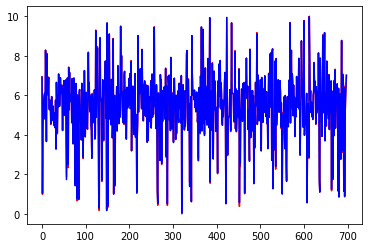

In [243]:
plt.plot(df_ytest,color='red',label='realprice')
plt.plot(dff2,color='blue',label='predicted')
plt.show()

In [110]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(ran,x,y,cv=5)
score

array([ 0.92245282,  0.34841976,  0.90139355,  0.73105929, -1.07054749])

In [111]:
score.mean()

0.3665555880959147